In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
## read the dataset
earthquake_data = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv')
earthquake_data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-01-23T14:36:26.385Z,32.408000,-101.478000,2.3430,1.10,ml,5.0,141.00,0.10000,0.4000,...,2025-01-23T14:44:01.294Z,"17 km N of Big Spring, Texas",earthquake,0.000000,3.765982,0.300000,6.0,automatic,tx,tx
1,2025-01-23T14:31:41.380Z,36.648700,-116.624500,15.9000,1.10,ml,11.0,213.85,0.25400,0.4646,...,2025-01-23T14:44:58.669Z,"30 km NE of Furnace Creek, California",earthquake,NaN,1.800000,1.270000,6.0,automatic,nn,nn
2,2025-01-23T14:31:10.290Z,35.599335,-118.344666,2.9700,2.49,ml,43.0,39.00,0.09577,0.1300,...,2025-01-23T14:50:34.421Z,"12 km E of Lake Isabella, CA",earthquake,0.210000,1.000000,0.331000,23.0,automatic,ci,ci
3,2025-01-23T14:25:49.270Z,36.668167,-121.324333,5.3000,3.16,ml,69.0,28.00,0.04308,0.2800,...,2025-01-23T14:47:18.455Z,"14 km SSW of Tres Pinos, CA",earthquake,0.310000,0.970000,0.238000,26.0,automatic,nc,nc
4,2025-01-23T14:05:21.890Z,40.191666,-122.109665,25.0100,2.74,md,27.0,57.00,0.02080,0.3000,...,2025-01-23T14:27:14.338Z,"11 km E of Red Bluff, CA",earthquake,0.740000,1.010000,0.120000,26.0,automatic,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,2024-12-24T15:20:17.486Z,37.347000,-117.196500,2.6000,0.70,ml,14.0,206.70,0.06900,0.3158,...,2024-12-24T15:22:32.961Z,"40 km S of Goldfield, Nevada",earthquake,NaN,1.500000,0.240000,5.0,automatic,nn,nn
8807,2024-12-24T15:18:39.353Z,62.785000,-150.875200,93.8000,1.50,ml,NaN,NaN,NaN,0.3200,...,2025-01-18T01:37:51.952Z,"32 km N of Petersville, Alaska",earthquake,NaN,0.300000,NaN,NaN,reviewed,ak,ak
8808,2024-12-24T15:13:38.532Z,59.948800,-151.871900,71.3000,2.20,ml,NaN,NaN,NaN,0.5600,...,2025-01-18T01:37:46.980Z,"7 km W of Happy Valley, Alaska",earthquake,NaN,0.300000,NaN,NaN,reviewed,ak,ak
8809,2024-12-24T15:05:53.815Z,32.195000,-102.132000,8.8623,1.80,ml,34.0,57.00,0.10000,0.1000,...,2024-12-26T12:33:15.701Z,"22 km NNW of Midland, Texas",earthquake,0.387219,0.803000,0.200000,40.0,reviewed,tx,tx


In [4]:
earthquake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8811 entries, 0 to 8810
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             8811 non-null   object 
 1   latitude         8811 non-null   float64
 2   longitude        8811 non-null   float64
 3   depth            8811 non-null   float64
 4   mag              8811 non-null   float64
 5   magType          8811 non-null   object 
 6   nst              7539 non-null   float64
 7   gap              7539 non-null   float64
 8   dmin             7537 non-null   float64
 9   rms              8809 non-null   float64
 10  net              8811 non-null   object 
 11  id               8811 non-null   object 
 12  updated          8811 non-null   object 
 13  place            8811 non-null   object 
 14  type             8811 non-null   object 
 15  horizontalError  6729 non-null   float64
 16  depthError       8810 non-null   float64
 17  magError      

In [5]:
earthquake_data.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1272
gap                1272
dmin               1274
rms                   2
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2082
depthError            1
magError           1292
magNst             1277
status                0
locationSource        0
magSource             0
dtype: int64

In [6]:
earthquake_data.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,8811.0,40.073397,18.486231,-65.2966,33.765250,38.821499,57.994650,75.7075
longitude,8811.0,-107.433039,69.149764,-179.8967,-149.990250,-121.941000,-113.981167,179.9916
depth,8811.0,18.979519,48.562146,-3.4900,2.240000,6.790000,12.135000,639.9160
mag,8811.0,1.537356,1.352950,-1.8900,0.740000,1.310000,2.000000,7.1000
nst,7539.0,22.813503,21.434072,0.0000,9.000000,15.000000,28.000000,246.0000
gap,7539.0,115.247200,63.120857,13.0000,68.000000,101.000000,146.000000,347.0000
dmin,7537.0,0.514560,1.941265,0.0000,0.016460,0.061390,0.129800,50.2180
rms,8809.0,0.261823,0.277868,0.0000,0.080000,0.160000,0.330000,3.6300
horizontalError,6729.0,1.847625,3.297889,0.0000,0.270000,0.440000,1.030000,26.9200
depthError,8810.0,2.177209,4.756417,0.0000,0.500000,0.860000,1.874000,111.2000


In [7]:
# Ensure 'type' is a valid column name
if 'type' in earthquake_data.columns:
	incident_counts = earthquake_data['type'].value_counts()
	print(incident_counts)
else:
	print("Column 'type' does not exist in the dataset.")

type
earthquake      8702
quarry blast      77
explosion         25
ice quake          7
Name: count, dtype: int64


In [8]:
# Filter the data for rows where type is 'earthquake'
earthquake_only = earthquake_data[earthquake_data['type'] == 'earthquake']

# Save the filtered DataFrame to a new CSV file
earthquake_only.to_csv('earthquake_only.csv', index=False)

In [9]:
# Check for missing values in the 'type' column
missing_types = earthquake_data['type'].isnull().sum()
print(f"Missing 'type' values: {missing_types}")

# Check for unique entries in the 'type' column to spot inconsistencies
unique_types = earthquake_data['type'].unique()
print("Unique 'type' entries:", unique_types)


Missing 'type' values: 0
Unique 'type' entries: ['earthquake' 'quarry blast' 'explosion' 'ice quake']


In [10]:
# Load the dataset
earthquake_data = pd.read_csv('earthquake_only.csv')

# Get the incident counts and convert to DataFrame
Types_of_Mag_counts = earthquake_data['magType'].value_counts()
Types_of_Mag_counts_df = Types_of_Mag_counts.reset_index()
Types_of_Mag_counts_df.columns = ['Type', 'Count']

# Display the table
print(Types_of_Mag_counts_df)

    Type  Count
0     ml   5596
1     md   2133
2     mb    849
3    mww     86
4    mwr     17
5  mb_lg      9
6     mw      9
7     mh      3


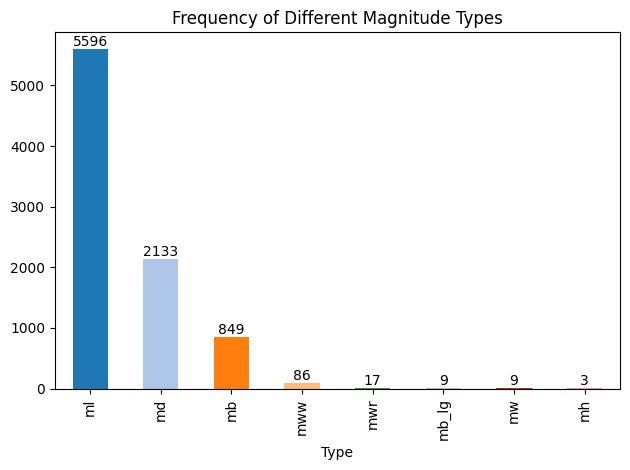

In [ ]:
# Define a list of colors
colors = plt.cm.tab20.colors  

# Plot the bar chart with different colors for each bar
fig, ax = plt.subplots()
Types_of_Mag_counts_df.plot(kind='bar', x='Type', y='Count', color=colors[:len(Types_of_Mag_counts_df)], ax=ax)
ax.set_title('Frequency of Different Magnitude Types')


# Remove the legend
ax.legend().set_visible(False)

# Add labels on top of each bar
for index, row in Types_of_Mag_counts_df.iterrows():
    ax.text(index, row['Count'], str(row['Count']), ha='center', va='bottom')

plt.tight_layout()
plt.show()

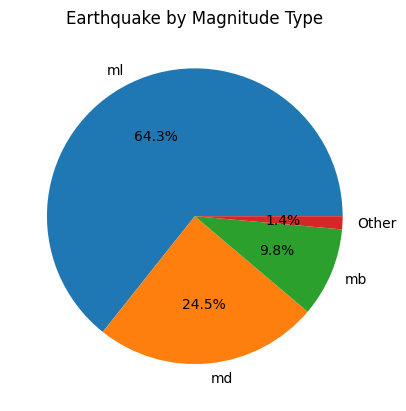

In [12]:
# Define a threshold for grouping small data points
threshold = 0.01 * Types_of_Mag_counts.sum()  # 1% of the total

# Separate the data points above and below the threshold
large_counts = Types_of_Mag_counts[Types_of_Mag_counts >= threshold]
small_counts = Types_of_Mag_counts[Types_of_Mag_counts < threshold]

# Add the small counts together under the label 'Other'
if not small_counts.empty:
    large_counts['Other'] = small_counts.sum()

# Plot the pie chart
fig, ax = plt.subplots()
ax.pie(large_counts, labels=large_counts.index, autopct='%1.1f%%')
ax.set_title('Earthquake by Magnitude Type')
plt.show()

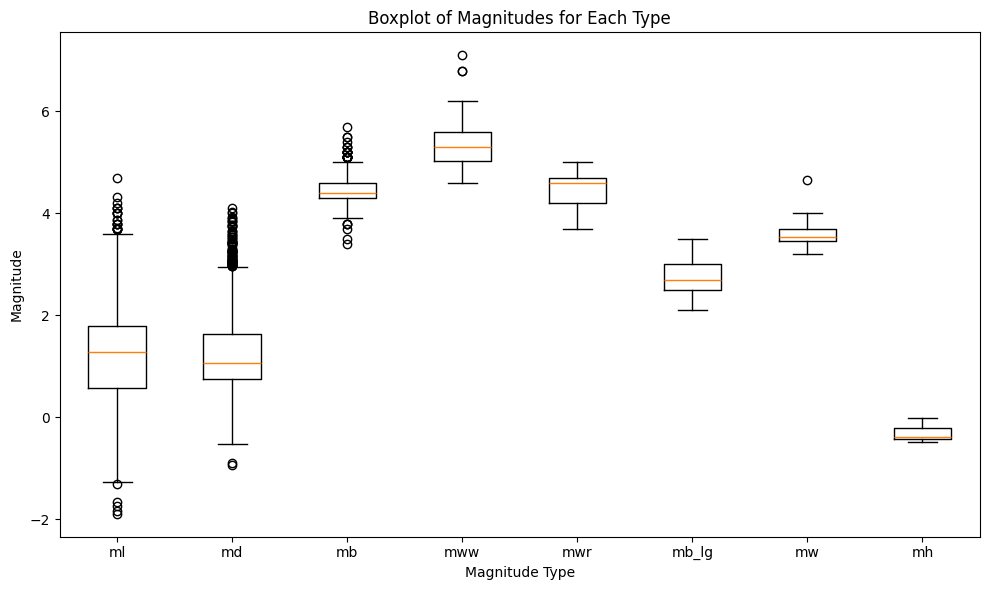

In [13]:

# Get the counts of each type and sort them by frequency
type_counts = earthquake_data['magType'].value_counts()
sorted_types = type_counts.index

# Prepare data for box plots in the sorted order
data = [earthquake_data[earthquake_data['magType'] == mag_type]['mag'] for mag_type in sorted_types]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, tick_labels=sorted_types)
plt.title('Boxplot of Magnitudes for Each Type')
plt.xlabel('Magnitude Type')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()


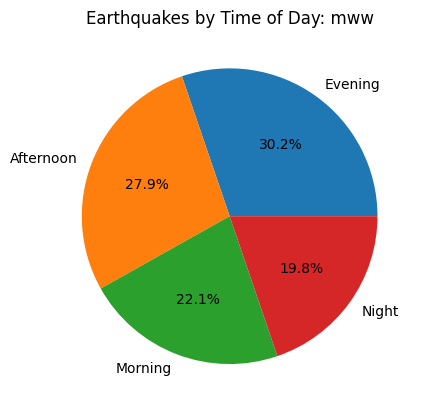

In [14]:
# Extract the time portion from the timestamp and categorize by time of day
earthquake_data['Time'] = pd.to_datetime(earthquake_data['time']).dt.strftime('%H:%M')

# create a function to give 4 time periods, morning, afternoon, evening and night
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

earthquake_data['Hour'] = pd.to_datetime(earthquake_data['time']).dt.hour
earthquake_data['Period'] = earthquake_data['Hour'].apply(time_of_day)


# Filter the data for 'mww' type
mww_data = earthquake_data[earthquake_data['magType'] == 'mww']
earthquake_count = mww_data['Period'].value_counts()


# Create a pie chart for 'mww' type
plt.pie(earthquake_count, labels=earthquake_count.index, autopct='%1.1f%%')
plt.title('Earthquakes by Time of Day: mww')
plt.show()


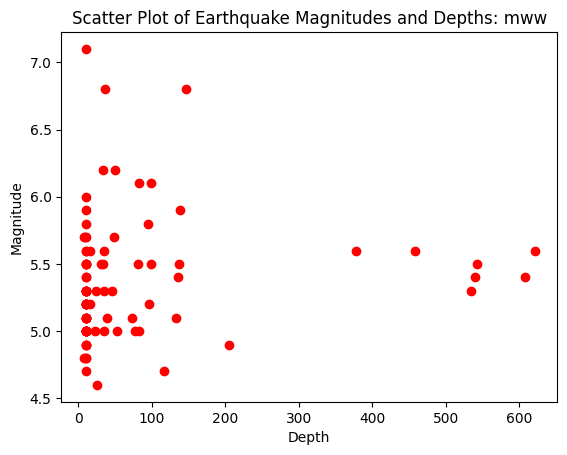

In [15]:

# Load the earthquake dataset
earthquake_data = pd.read_csv('earthquake_only.csv')

# Filter the data for 'mww' type
mww_data = earthquake_data[earthquake_data['magType'] == 'mww']

# Create a scatter plot for 'mww' type
fig, ax = plt.subplots()
X = mww_data['depth']  # Use filtered data for X (depth)
Y = mww_data['mag']  # Use filtered data for Y (magnitude)
ax.scatter(X, Y, color='red')
ax.set_title('Scatter Plot of Earthquake Magnitudes and Depths: mww')
ax.set_xlabel('Depth')
ax.set_ylabel('Magnitude')
plt.show()